In [1]:

import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image
     

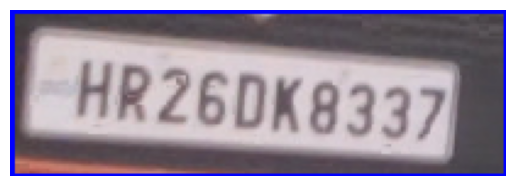

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("number_plates/Number Plate.png")

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis
plt.show()

In [3]:
reader = easyocr.Reader(['en'])


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [4]:
output = reader.readtext(image)
output

[([[18, 12], [187, 12], [187, 64], [18, 64]],
  'HR260K8337',
  0.45399340124909576)]

In [5]:
# Assuming output contains the OCR results as provided
number_plates = []

# Iterate through each detected text region
for region in output:
    text = region[1]
    number_plates.append(text)

# Print only the number plate numbers
print("Number Plate Numbers:")
for plate in number_plates:
    print(plate)

Number Plate Numbers:
HR260K8337


In [6]:
cord = output[-1][0]


In [7]:
cord


[[18, 12], [187, 12], [187, 64], [18, 64]]

In [8]:
a = list(zip(*cord))
a

[(18, 187, 187, 18), (12, 12, 64, 64)]

In [9]:
min(a[0])


18

In [10]:
min(a[1])


12

In [11]:
max(a[0])


187

In [12]:
max(a[1])


64

In [13]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_min, y_min
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
x_max, y_max


(187, 64)

In [14]:

from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

In [15]:
# Assuming ground truth text is provided
ground_truth_text = "HR26DK8337"

# Extract recognized text from OCR output
recognized_text = ''.join(region[1] for region in output)

# Calculate accuracy
correct_characters = sum(1 for pred, true in zip(recognized_text, ground_truth_text) if pred == true)
accuracy = correct_characters / len(ground_truth_text)

# Calculate precision
precision = correct_characters / len(recognized_text)

# Calculate recall
recall = correct_characters / len(ground_truth_text)

# Calculate F1 score if precision and recall are not zero
if precision + recall != 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0.0  # Assign a default value if precision + recall is zero

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1 Score: 0.9


In [16]:
# Error analysis
errors = [(pred, true) for pred, true in zip(recognized_text, ground_truth_text) if pred != true]

# Print errors
print("Errors:")
for pred, true in errors:
    print(f"Predicted: {pred}, Ground Truth: {true}")


Errors:
Predicted: 0, Ground Truth: D


In [24]:
# Dictionary to store information associated with each number plate
plate_info_dict = {
    'HR260K8337': {
        'owner': 'John Doe',
        'vehicle_model': 'Toyota Corolla',
        # Add more fields as needed
    },
    # Add more entries for other number plates
}

# Function to process the OCR output
def process_ocr_output(output):
    number_plates = []

    # Iterate through each detected text region
    for region in output:
        text = region[1]
        number_plates.append(text)

    return number_plates

# Example usage
output = [([[18, 12], [187, 12], [187, 64], [18, 64]], 'HR260K8337', 0.45399340124909576)]

# Process the OCR output to extract number plate text
number_plates = process_ocr_output(output)

# Print only the number plate numbers
print("Number Plate Numbers:")
for plate_text in number_plates:
    print(plate_text)

# Query the dictionary for information associated with the number plate text
for plate_text in number_plates:
    plate_info = plate_info_dict.get(plate_text)
    if plate_info:
        print("Owner:", plate_info['owner'])
        print("Vehicle Model:", plate_info['vehicle_model'])
    else:
        print("No information found for plate number", plate_text)



Number Plate Numbers:
HR260K8337
Owner: John Doe
Vehicle Model: Toyota Corolla
